In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
kinase = pd.read_csv("/localdisk/home/s1345888/data/desc-fp4-usrcat-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)
non_kinase = pd.read_csv("/localdisk/home/s1345888/data/desc-fp4-usrcat-non-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)

kinase_ecfp4 = pd.read_csv("/localdisk/home/s1345888/data/desc-ecfp4-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)
non_kinase_ecfp4 = pd.read_csv("/localdisk/home/s1345888/data/desc-ecfp4-non-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)

kinase_fepops = pd.read_csv("/localdisk/home/s1345888/data/desc-fepops-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)
non_kinase_fepops = pd.read_csv("/localdisk/home/s1345888/data/desc-fepops-non-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)


In [3]:
kinase_fp4 = kinase.iloc[:,1:129].as_matrix()
non_kinase_fp4 = non_kinase.iloc[:,1:129].as_matrix()

kinase_usrcat = kinase.iloc[:,129:].as_matrix()
non_kinase_usrcat = non_kinase.iloc[:,129:].as_matrix()

kinase_ecfp4 = kinase_ecfp4.iloc[:,1:].as_matrix()
non_kinase_ecfp4 = non_kinase_ecfp4.iloc[:,1:].as_matrix()

kinase_fepops = kinase_fepops.iloc[:,1:].as_matrix()
non_kinase_fepops = non_kinase_fepops.iloc[:,1:].as_matrix()



In [12]:
# make kinase non_kinase array a use simpple a = [a, b[:,0]] to append columns within loop to 
# for n,k in zip (non_kinase_kinase):
non_kinase = [non_kinase_fp4, non_kinase_usrcat, non_kinase_ecfp4, non_kinase_fepops]
kinase = [kinase_fp4, kinase_usrcat, kinase_ecfp4, kinase_fepops]

non_kin_coor = []
kin_coor = []

for n,k in zip(non_kinase, kinase):
    pca = PCA(n_components=2)
    pca.fit(n)
    non_kin = pca.transform(n)
    kin = pca.transform(k)
    non_kin_coor.append(non_kin[:,0])
    non_kin_coor.append(non_kin[:,1])
    kin_coor.append(kin[:,0])
    kin_coor.append(kin[:,1])
    


#pca_fp4 = PCA( n_components=2 )
#pca_fp4.fit(non_kinase_fp4)

#fp4_non_kinase = pca_fp4.transform( non_kinase_fp4 )
#fp4_kinase = pca_fp4.transform( kinase_fp4 )

#pca_usrcat = PCA( n_components=2 )
#pca_usrcat.fit(non_kinase_usrcat)

#usrcat_non_kinase = pca_usrcat.transform( non_kinase_usrcat )
#usrcat_kinase = pca_usrcat.transform( kinase_usrcat )

#pca_ecfp4 = PCA( n_components=2 )
#pca_ecfp4.fit(non_kinase_ecfp4)

#ecfp4_non_kinase = pca_ecfp4.transform( non_kinase_ecfp4 )
#ecfp4_kinase = pca_ecfp4.transform( kinase_ecfp4 )

#pca_fepops = PCA( n_components=2 )
#pca_fepops.fit(non_kinase_fepops)

#fepops_non_kinase = pca_fepops.transform( non_kinase_fepops )
#fepops_kinase = pca_fepops.transform( kinase_fepops )

In [23]:
#non_kin_coor= [fp4_non_kinase[:,0], fp4_non_kinase[:,1], usrcat_non_kinase[:,0], usrcat_non_kinase[:,1], ecfp4_non_kinase[:,0], ecfp4_non_kinase[:,1], fepops_non_kinase[:,0], fepops_non_kinase[:,1]]
#kin_coor= [fp4_kinase[:,0], fp4_kinase[:,1], usrcat_kinase[:,0], usrcat_kinase[:,1], ecfp4_kinase[:,0], ecfp4_kinase[:,1], fepops_kinase[:,0], fepops_kinase[:,1]]

In [15]:
non_kin_coor[1]

array([-0.93996184,  1.03468382,  1.74245095, ..., -1.1344399 ,
       -0.78059982,  0.70900071])

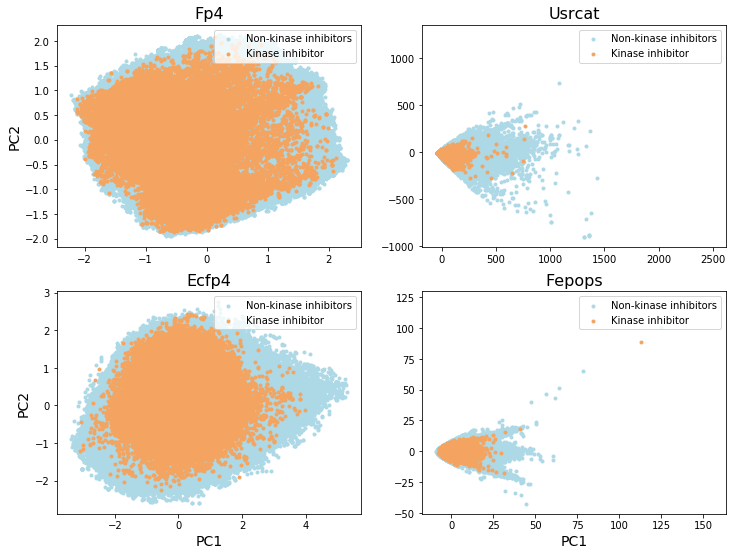

In [16]:
f, axarr = plt.subplots(2, 2,figsize=(12,9))

i=0
for k, arr in enumerate(f.axes):
    arr.scatter(non_kin_coor[i], non_kin_coor[(i+1)], marker='.', color='lightblue', alpha=1, label='Non-kinase inhibitors')
    arr.scatter(kin_coor[i], kin_coor[i+1], marker='.', color = 'sandybrown',alpha=1, label='Kinase inhibitor') 
    arr.legend(prop={'size': 10}, loc='upper right')
    i = i+2

axarr[0, 0].set_title('Fp4', fontsize=16)
axarr[0, 1].set_title('Usrcat', fontsize=16)
axarr[1, 0].set_title('Ecfp4', fontsize=16)
axarr[1, 1].set_title('Fepops', fontsize=16)

axarr[0,0].set_ylabel('PC2', fontsize=14)
axarr[1,0].set_ylabel('PC2', fontsize=14)

axarr[1,0].set_xlabel('PC1', fontsize=14)
axarr[1,1].set_xlabel('PC1', fontsize=14)

plt.show()



In [ ]:
f.savefig('PCA_1.png', bbox_inches='tight')

In [4]:
kinase_ecfp4 = pd.read_csv("/localdisk/home/s1345888/data/desc-ecfp4-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)
non_kinase_ecfp4 = pd.read_csv("/localdisk/home/s1345888/data/desc-ecfp4-non-kinaseInhibitors-ChEMBL23.csv",header=None,low_memory=False)
new = pd.read_csv('/localdisk/home/s1345888/data/desc-ecfp4-NewChEMBL24KinaseInhibitors.dat', header=None, low_memory=False)


In [5]:
kinase_ecfp4 = kinase_ecfp4.iloc[:,1:].as_matrix()
non_kinase_ecfp4 = non_kinase_ecfp4.iloc[:,1:].as_matrix()
new_ecfp4 = new.iloc[:,1:].as_matrix()

In [7]:

pca = PCA(n_components=2)
pca.fit(non_kinase_ecfp4)
non_kin = pca.transform(non_kinase_ecfp4)
kin = pca.transform(kinase_ecfp4)
new_mol = pca.transform(new_ecfp4)


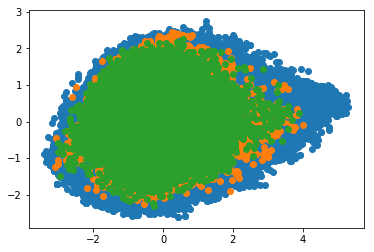

In [8]:
plt.scatter(non_kin[:,0], non_kin[:,1])
plt.scatter(kin[:,0], kin[:,1])
plt.scatter(new_mol[:,0], new_mol[:,1])
plt.show()

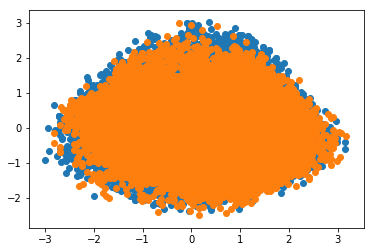

In [10]:
kinase_space = np.concatenate((kinase_ecfp4,new_ecfp4),axis=0)
pca2 = PCA(n_components=2)
pca.fit(kinase_space)
old = pca.transform(kinase_ecfp4)
new = pca.transform(new_ecfp4)

plt.scatter(old[:,0], old[:,1])
plt.scatter(new[:,0], new[:,1])
